## 1. Generation of responses

In [37]:
import random
import numpy as np 
from scipy.stats import norm
import matplotlib.pyplot as plt
from sklearn import linear_model

In [38]:
# Set the seed for reproducibility
np.random.seed(42)

# Number of data points
num_points = 50

# Generate data for S_0 (mean=0, std=1)
S_0 = np.random.normal(loc=0, scale=1, size=num_points)

# Generate data for S (mean=1, std=1)
S = np.random.normal(loc=1, scale=0.8, size=num_points)

Trials for which x > 1.1 are counted as ’yes - high
confidence’ responses. Trials for which 0.5 < x < 1.1 are counted as ’yes - low confidence’ responses. Trials for which 0.0 < x < 0.5 are counted as ’no - low confidence’ responses

Para poder gestionar las respuestas del observador: 
Trials for which x > 1.1 are counted as ’yes - high
confidence’ responses. Trials for which 0.5 < x < 1.1 are counted as ’yes - low confidence’ responses.
Trials for which 0.0 < x < 0.5 are counted as ’no - low confidence’ responses. Remaining trials are
counted as ’no - high confidence responses

In [39]:
# Define the criteria for each category
yes_high_confidence_criteria = 1.1
yes_low_confidence_high_criteria = 0.5
no_low_confidence_low_criteria = 0.0

# Count the number of trials in each category for S_0 and S
yes_high_confidence = [np.sum(S_0 > yes_high_confidence_criteria)/num_points, np.sum(S > yes_high_confidence_criteria)/num_points]
yes_low_confidence= [np.sum((S_0 > yes_low_confidence_high_criteria) & (S_0 < yes_high_confidence_criteria))/num_points, np.sum((S > yes_low_confidence_high_criteria) & (S < yes_high_confidence_criteria))/num_points]
no_low_confidence= [np.sum((S_0 > no_low_confidence_low_criteria) & (S_0 < yes_low_confidence_high_criteria))/num_points,np.sum((S > no_low_confidence_low_criteria) & (S < yes_low_confidence_high_criteria))/num_points]
no_high_confidence= [np.sum(S_0 < no_low_confidence_low_criteria)/num_points, np.sum(S < no_low_confidence_low_criteria)/num_points]

# Prints 
print(f"Category: Yes - High Confidence\nS_0: {yes_high_confidence[0]}, S: {yes_high_confidence[1]}\n")
print(f"Category: Yes - Low Confidence\nS_0: {yes_low_confidence[0]}, S: {yes_low_confidence[1]}\n")
print(f"Category: No - Low Confidence\nS_0: {no_low_confidence[0]}, S: {no_low_confidence[1]}\n")
print(f"Category: No - High Confidence\nS_0: {no_high_confidence[0]}, S: {no_high_confidence[1]}")

Category: Yes - High Confidence
S_0: 0.08, S: 0.44

Category: Yes - Low Confidence
S_0: 0.12, S: 0.36

Category: No - Low Confidence
S_0: 0.2, S: 0.14

Category: No - High Confidence
S_0: 0.6, S: 0.06


We have the 4 categories, so we need 3 c.

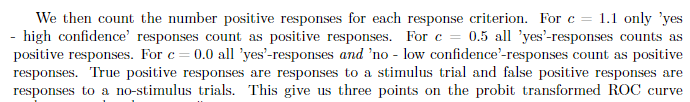

In [40]:
# So we pick as positive responses only the Yes-High confidence category
c1 = 1.1
c1_Fp, c1_Tp = yes_high_confidence[0], yes_high_confidence[1]
c1_Fp_probit, c1_Tp_probit = norm.ppf(c1_Fp), norm.ppf(c1_Tp)

# For the second criteria c = 0.5 we pick as positives the Yes-High confidence category and the Yes-Low confidence category
c2 = 0.5
c2_Fp, c2_Tp = yes_high_confidence[0]+yes_low_confidence[0], yes_high_confidence[1]+yes_low_confidence[1]
c2_Fp_probit, c2_Tp_probit = norm.ppf(c2_Fp), norm.ppf(c2_Tp)

#For the third criteria c = 0 we pick both of the yes and the No-Low confidence as positive responses
c3 = 0
c3_Fp, c3_Tp = yes_high_confidence[0]+yes_low_confidence[0] + no_low_confidence[0], yes_high_confidence[1]+yes_low_confidence[1] + no_low_confidence[1]
c3_Fp_probit, c3_Tp_probit = norm.ppf(c3_Fp), norm.ppf(c3_Tp)

In [41]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
X = np.array([c1_Fp_probit, c2_Fp_probit, c3_Fp_probit]).reshape(-1, 1)
y = np.array([c1_Tp_probit, c2_Tp_probit, c3_Tp_probit])

# Train the linear regression model    
regr.fit(X, y)

# Get the coefficients a (slope) and b (intercept) 
a = regr.coef_[0]
b = regr.intercept_

# Now we estimate mu, sigma and auc
sigma = 1/a
mu = b*sigma
auc = norm.cdf(mu/(np.sqrt(1+sigma**2)))

Mean of mu: 1.0520764375598102
Mean of sigma: 0.8435857647211756
Mean of AUC: 0.7846977061082581


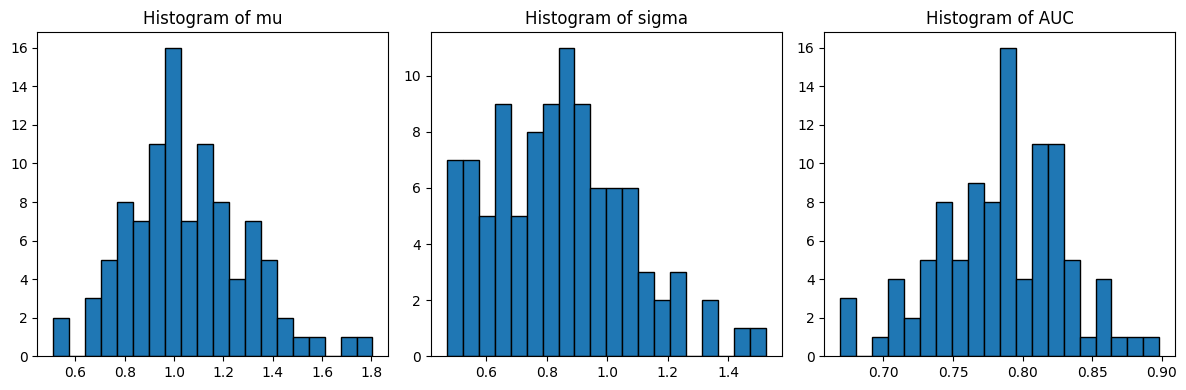

In [42]:
# Number of experiments
num_experiments = 100
num_points = 50

yes_high_confidence_criteria = 1.1
yes_low_confidence_high_criteria = 0.5
no_low_confidence_low_criteria = 0.0

mu_list = []
sigma_list = []
auc_list = []

for _ in range(num_experiments):
    S_0 = np.random.normal(loc=0, scale=1, size=num_points)
    S = np.random.normal(loc=1, scale=0.8, size=num_points)

    yes_high_confidence = [np.sum(S_0 > yes_high_confidence_criteria)/num_points, np.sum(S > yes_high_confidence_criteria)/num_points]
    yes_low_confidence= [np.sum((S_0 > yes_low_confidence_high_criteria) & (S_0 < yes_high_confidence_criteria))/num_points, np.sum((S > yes_low_confidence_high_criteria) & (S < yes_high_confidence_criteria))/num_points]
    no_low_confidence= [np.sum((S_0 > no_low_confidence_low_criteria) & (S_0 < yes_low_confidence_high_criteria))/num_points,np.sum((S > no_low_confidence_low_criteria) & (S < yes_low_confidence_high_criteria))/num_points]
    no_high_confidence= [np.sum(S_0 < no_low_confidence_low_criteria)/num_points, np.sum(S < no_low_confidence_low_criteria)/num_points]

    c1_Fp, c1_Tp = yes_high_confidence[0], yes_high_confidence[1]
    c1_Fp_probit, c1_Tp_probit = norm.ppf(c1_Fp), norm.ppf(c1_Tp)

    c2_Fp, c2_Tp = yes_high_confidence[0]+yes_low_confidence[0], yes_high_confidence[1]+yes_low_confidence[1]
    c2_Fp_probit, c2_Tp_probit = norm.ppf(c2_Fp), norm.ppf(c2_Tp)

    c3_Fp, c3_Tp = yes_high_confidence[0]+yes_low_confidence[0] + no_low_confidence[0], yes_high_confidence[1]+yes_low_confidence[1] + no_low_confidence[1]
    c3_Fp_probit, c3_Tp_probit = norm.ppf(c3_Fp), norm.ppf(c3_Tp)

    regr = linear_model.LinearRegression()
    X = np.array([c1_Fp_probit, c2_Fp_probit, c3_Fp_probit]).reshape(-1, 1)
    y = np.array([c1_Tp_probit, c2_Tp_probit, c3_Tp_probit])
    regr.fit(X, y)

    a = regr.coef_[0]
    b = regr.intercept_

    sigma = 1 / a
    mu = b * sigma
    auc = norm.cdf(mu / (np.sqrt(1 + sigma ** 2)))

    mu_list.append(mu)
    sigma_list.append(sigma)
    auc_list.append(auc)

# Convert lists to arrays
mu_array = np.array(mu_list)
sigma_array = np.array(sigma_list)
auc_array = np.array(auc_list)

# Calculate the means
mu_mean = np.mean(mu_array)
sigma_mean = np.mean(sigma_array)
auc_mean = np.mean(auc_array)

# Print the means
print(f"Mean of mu: {mu_mean}")
print(f"Mean of sigma: {sigma_mean}")
print(f"Mean of AUC: {auc_mean}")

# Plot histograms
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(mu_array, bins=20, edgecolor='black')
plt.title('Histogram of mu')

plt.subplot(1, 3, 2)
plt.hist(sigma_array, bins=20, edgecolor='black')
plt.title('Histogram of sigma')

plt.subplot(1, 3, 3)
plt.hist(auc_array, bins=20, edgecolor='black')
plt.title('Histogram of AUC')

plt.tight_layout()
plt.show()
